## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##  2. Loading the dataset

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
                    , delimiter=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# Names of all the columns in features
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [4]:
# Checking if there are any non-null values in dataset
# and also confirming that columns have right datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Conclusions ->

| **Sr. no.** | **Name** | **Description** |
| :---: | ---- | ---- |
| 1 | **fixed acidity** | Primary fixed acids found in wine are tartaric, succinic, citric, and malic |
| 2 | **volatile acidity** | Volatile acidity is the gaseous acids present in wine. |
| 3 | **citric acid** | It is weak organic acid, found in citrus fruits naturally. |
| 4 | **residual sugar** | Amount of sugar left after fermentation. |
| 5 | **chlorides** | Amount of salt present in wine.|
| 6 | **free sulphur dioxide** | So2 used for prevention of wine by oxidation and microbial spoilage. |
| 7 | **total sulphur dioxides** | Sum of free and combined SO2 |
| 8 | **density** | thickness of wine | 
| 9 | **pH** |  pH is used for checking acidity |
| 10 | **sulphates** | Added sulfites preserve freshness and protect wine from oxidation, and bacteria. |
| 11 | **alcohol** | Percent of alcohol present in wine. |
| 12 | **quality** | Target label with 6 classes in range 3-8 |

- This is a multiclass classification problem, as labels are discrete.
- There are 11 features (attributes).
- There are no null values, so we don't need to do Data manipulation
- 

## 3. Exploratory data analysis

Exploratory data analysis (EDA) is an approach to analyze data sets to summarize their main characteristics, often with visual methods.

- It helps us to uncover the underlying structure of data and its dynamics through which we can maximize the insights. 
- EDA is also critical to extract important variables and detect outliers and anomalies. 
- EDA is considered one of the most critical parts to understand the data.

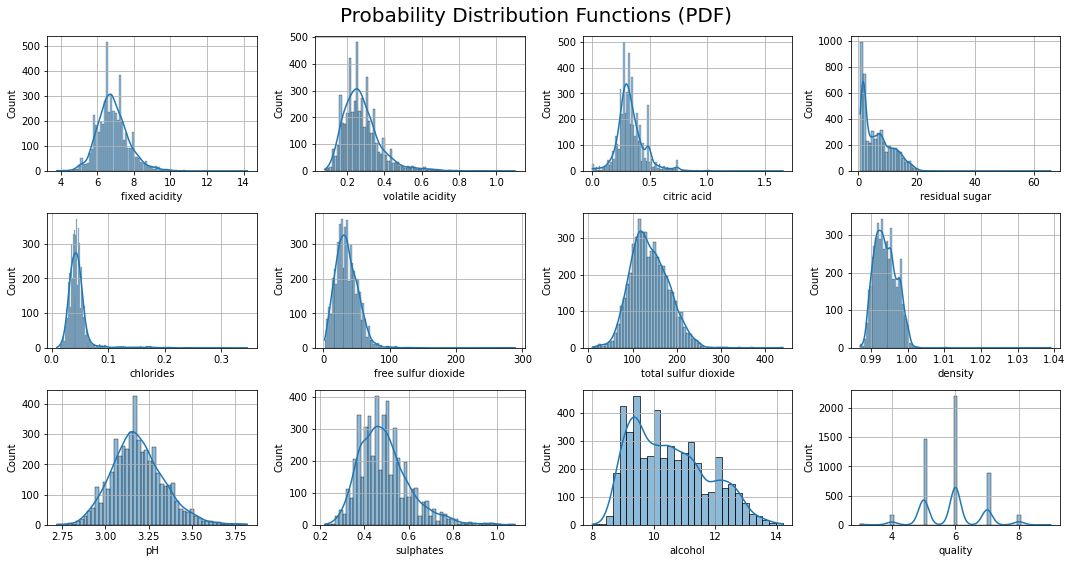

In [5]:
# features.hist(figsize=(15,10), bins=20);

# Plotting the histplot + kde of all the featues to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns.values):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.grid(); plt.tight_layout()
    plt.suptitle("Probability Distribution Functions (PDF)", size=20)

> We can conclude from above KDE plots that **pH** and **density** attributes have near normal disribuiton.

> All other attributes are positively skewed

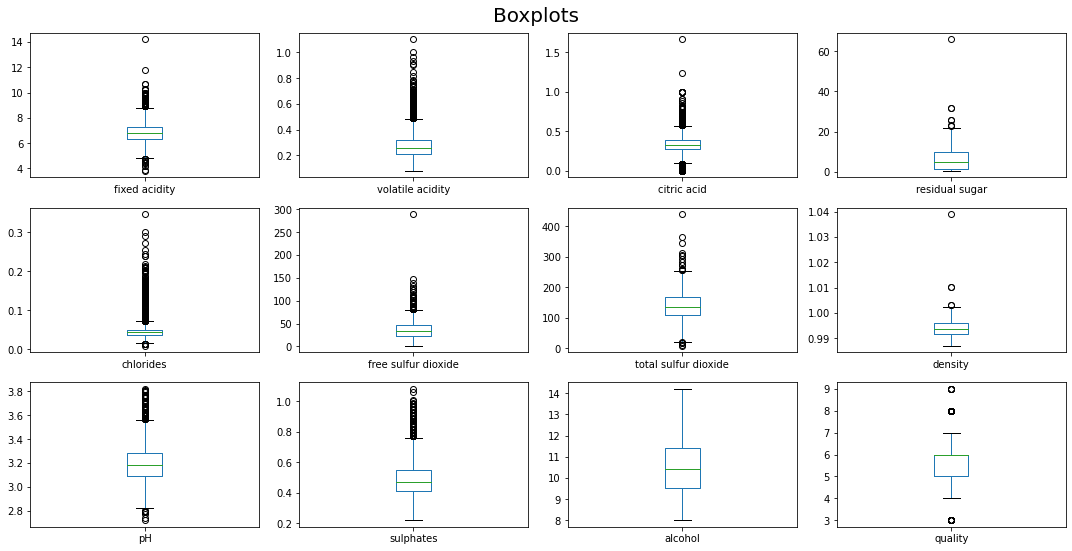

In [6]:
# Plotting the boxplot of all the featues to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns.values):
    plt.subplot(4, 4, i+1)
    data.boxplot(col)
    plt.grid(); plt.tight_layout()
    plt.suptitle("Boxplots", size=20)

> We can conclude form the above boxplots that all columns have outliers

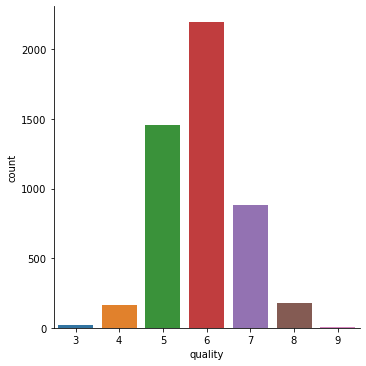

In [7]:
# Visualizing the count of all 6 classes of target label
sns.catplot(x='quality', data = data, kind = 'count')

> “quality” has a high number of values in categories 5 and 6.

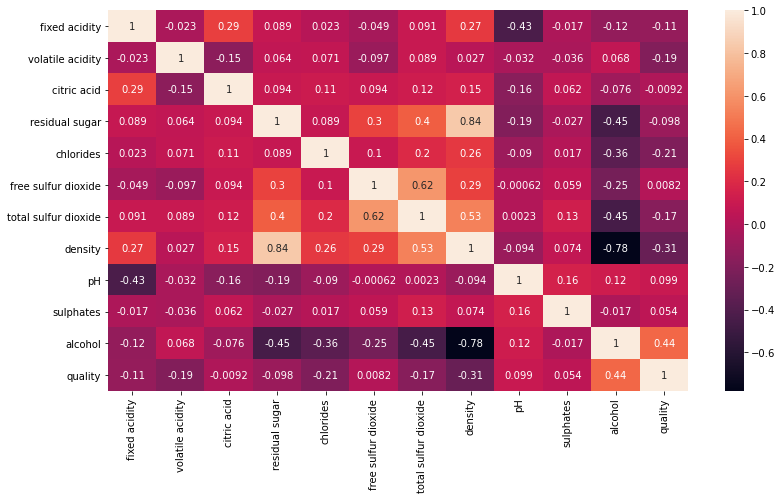

In [8]:
# Checking the correlation between features
plt.figure(figsize=(13, 7))
sns.heatmap(data.corr(), annot=True, color='k');

## 4. Data Preprocessing

### Dividing the data into test and training sets

In [9]:
# separate the feature and Label
X = data.drop('quality',axis=1)
y = data['quality'].copy()


In [10]:
# from sklearn.preprocessing import LabelBinarizer
# y = LabelBinarizer().fit_transform(y)
y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
# y

In [11]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Building various models

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
final_scores = {}

### 1 Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

pipe1 = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)
print(classification_report(y_test, y_pred1))
final_scores['DecisionTree']  = pipe1.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       753
           1       0.61      0.67      0.63       227

    accuracy                           0.82       980
   macro avg       0.75      0.77      0.76       980
weighted avg       0.83      0.82      0.83       980



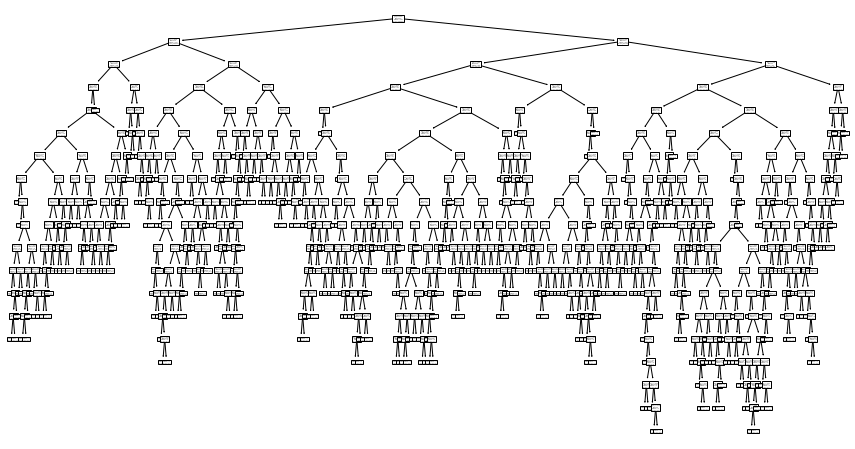

In [16]:
# Visualizing the decision tree
from sklearn import tree
fig = plt.figure(figsize=(15,8))
tree.plot_tree(pipe1['decisiontreeclassifier']);
fig.savefig('dtree.png')

### 2 Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

pipe2 = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
print(classification_report(y_test, y_pred2))
final_scores['RandomForest'] = pipe2.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       753
           1       0.84      0.63      0.72       227

    accuracy                           0.89       980
   macro avg       0.87      0.80      0.83       980
weighted avg       0.88      0.89      0.88       980



### 3 AdaBoost

In [18]:
from sklearn.ensemble import AdaBoostClassifier

pipe3 = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))
pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)
print(classification_report(y_test, y_pred3))
final_scores['AdaBoost'] = pipe3.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       753
           1       0.62      0.43      0.51       227

    accuracy                           0.81       980
   macro avg       0.73      0.68      0.69       980
weighted avg       0.79      0.81      0.79       980



### 4 Gradient Boost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

pipe4 = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))
pipe4.fit(X_train, y_train)
y_pred4 = pipe4.predict(X_test)
print(classification_report(y_test, y_pred4))
final_scores['GradBoost'] =  pipe4.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       753
           1       0.70      0.44      0.54       227

    accuracy                           0.83       980
   macro avg       0.78      0.69      0.72       980
weighted avg       0.82      0.83      0.81       980



### 5 Naive Bayes classifier

In [20]:
from sklearn.naive_bayes import GaussianNB

pipe5 = make_pipeline(StandardScaler(), GaussianNB())
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)
print(classification_report(y_test, y_pred5))
final_scores['NaiveBayes'] =  pipe5.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       753
           1       0.43      0.70      0.53       227

    accuracy                           0.71       980
   macro avg       0.66      0.71      0.66       980
weighted avg       0.78      0.71      0.73       980



### 6 Support Vector Classifier

In [21]:
from sklearn.svm import SVC

pipe6 = make_pipeline(StandardScaler(), SVC())
pipe6.fit(X_train, y_train)
y_pred6 = pipe6.predict(X_test)
print(classification_report(y_test, y_pred6))
final_scores['SupportVector'] = pipe6.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       753
           1       0.75      0.34      0.47       227

    accuracy                           0.82       980
   macro avg       0.79      0.65      0.68       980
weighted avg       0.81      0.82      0.79       980



### 7 Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegressionCV

pipe7 = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=1))
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)
print(classification_report(y_test, y_pred7))
final_scores['LogisticRegression'] = pipe7.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       753
           1       0.58      0.25      0.35       227

    accuracy                           0.78       980
   macro avg       0.69      0.60      0.61       980
weighted avg       0.75      0.78      0.75       980



In [23]:
# Comparing 7 of above models - 
final_scores = dict(sorted(final_scores.items(), key=lambda item: item[1], reverse=True))
final_scores

{'RandomForest': 0.8877551020408163,
 'GradBoost': 0.8275510204081633,
 'DecisionTree': 0.8224489795918367,
 'SupportVector': 0.8214285714285714,
 'AdaBoost': 0.8061224489795918,
 'LogisticRegression': 0.7836734693877551,
 'NaiveBayes': 0.7122448979591837}

## Selecting best features

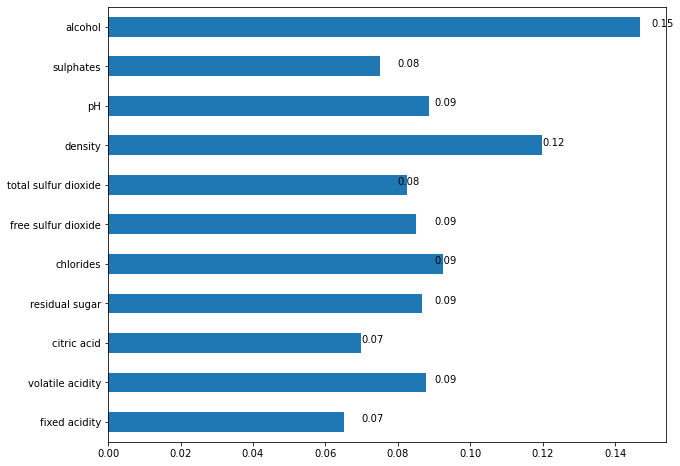

In [24]:
feat_importances = pd.Series(pipe2['randomforestclassifier'].feature_importances_, 
                             index= X_train.columns)
feat_importances.plot(kind='barh',figsize=(10,8))

for i, v in enumerate(round(feat_importances, 2)):
    plt.text(v, i, str(v))

### CONCLUSION - 
So, alcohol content is the most important feature in predicting the quality of wine 